In [1]:
%matplotlib notebook
import scimple as scm
import numpy as np
import pandas as pd
adult = scm.get_sample('adults')
#{0: 'age', 1: 'work class', 2: 'fnlwgt', 3: 'education', 4: 'education-num', 5: 'marital-status', 6: 'occupation', 7: 'relationship', 8: 'race', 9: 'sex', 10: 'capital-gain', 11: 'capital-loss', 12: 'hours-per-week', 13: 'native-country', 14: 'salary'}
df = spark.createDataFrame(adult[1:], list(adult[0]))

In [ ]:
rdd = df.rdd
rdd.collect()

In [2]:
df.show()

+---+----------------+------+------------+-------------+--------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
|age|      work class|fnlwgt|   education|education-num|      marital-status|       occupation| relationship|              race|   sex|capital-gain|capital-loss|hours-per-week|native-country|salary|
+---+----------------+------+------------+-------------+--------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
| 50|Self-emp-not-inc| 83311|   Bachelors|           13|  Married-civ-spouse|  Exec-managerial|      Husband|             White|  Male|           0|           0|            13| United-States| <=50K|
| 38|         Private|215646|     HS-grad|            9|            Divorced|Handlers-cleaners|Not-in-family|             White|  Male|           0|           0|            40| United-States| <=50K|
| 53|

In [3]:
#res = df.rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_m = df[df['sex'] == 'Male'].rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_f = df[df['sex'] == 'Female'].rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()


In [ ]:
res_m = [scm.flatten_n_times(1,elem) for elem in res_m]
res_f = [scm.flatten_n_times(1,elem) for elem in res_f]
res_m[:5]

<IPython.core.display.Javascript object>


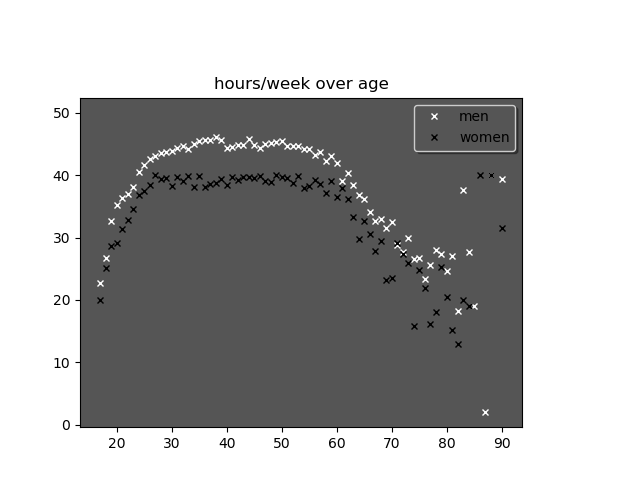

In [5]:
scm.Plot(2, bg_color='#555555', title="hours/week over age")\
.add(res_m, 0, lambda i, y:res_m[i][2]/res_m[i][1], marker='x', markersize=4, colored_by='#ffffff', label='men')\
.add(res_f, 0, lambda i, y:res_f[i][2]/res_f[i][1], marker='x', markersize=4, colored_by='#000000', label='women')


In [6]:
#res = df.rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_um = df[df['native-country'] == 'United-States'][df['sex'] == 'Male']
res_um_count = res_um.count()
res_um = res_um.rdd.map(lambda line:(line['salary'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()

res_ff = df[df['native-country'] == 'France'][df['sex'] == 'Female']
res_ff_count = res_ff.count()
res_ff = res_ff.rdd.map(lambda line:(line['salary'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()

res_uf = df[df['native-country'] == 'United-States'][df['sex'] == 'Female']
res_uf_count = res_uf.count()
res_uf = res_uf.rdd.map(lambda line:(line['salary'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()

res_fm = df[df['native-country'] == 'France'][df['sex'] == 'Male']
res_fm_count = res_fm.count()
res_fm = res_fm.rdd.map(lambda line:(line['salary'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()
res_fm

[('>50K', 9), ('<=50K', 8)]

In [7]:
labels = [elem[0] for elem in res_ff]
labels

['>50K', '<=50K']

In [9]:
print(len(scm.flatten_n_times(1, [[salary]*len(np.arange(0,0.4,0.01)) for salary in labels])))
print(len(scm.flatten_n_times(1, len(labels)*[np.arange(0,0.4,0.01)])))


80
80


<IPython.core.display.Javascript object>


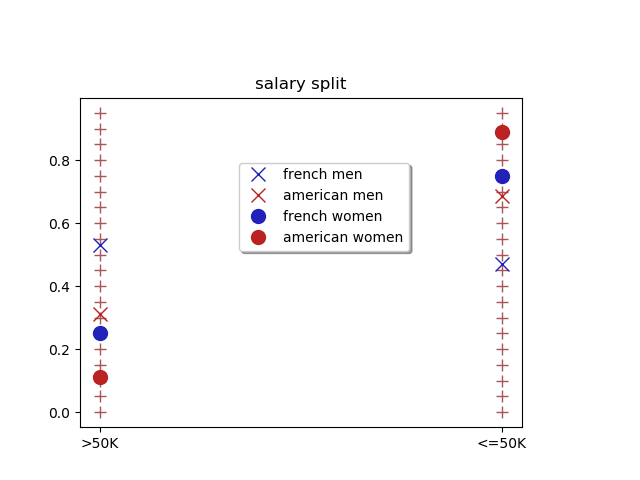

In [24]:
scm.Plot(2, bg_color='#ffffff', title="salary split")\
.add(x=scm.flatten_n_times(1, [[educ]*len(np.arange(0,1,0.05)) for educ in labels]),
    y=scm.flatten_n_times(1, len(labels)*[np.arange(0,1,0.05)]), marker='+', colored_by='#aa5555')\
.add(res_fm, 0, [res_fm[i][1]/res_fm_count for i in range(len(res_fm))], marker='x', markersize=10, colored_by='#2222bb', label='french men')\
.add(res_um, 0, [res_um[i][1]/res_um_count for i in range(len(res_um))], marker='x', markersize=10, colored_by='#bb2222', label='american men')\
.add(res_ff, 0, [res_ff[i][1]/res_ff_count for i in range(len(res_ff))], marker='o', markersize=10, colored_by='#2222bb', label='french women')\
.add(res_uf, 0, [res_uf[i][1]/res_uf_count for i in range(len(res_uf))], marker='o', markersize=10, colored_by='#bb2222', label='american women')

In [ ]:
scm.Plot(2, bg_color='#ffffff', title="salary split")\
.add(x=scm.flatten_n_times(1, [[educ]*len(np.arange(0,1,0.05)) for educ in labels]),
    y=scm.flatten_n_times(1, len(labels)*[np.arange(0,1,0.05)]), marker='+', colored_by='#aa5555')\
.add(res_fm, 0, [res_fm[i][1]/res_fm_count for i in range(len(res_fm))], marker='x', markersize=10, colored_by='#2222bb', label='french men')\
.add(res_um, 0, [res_um[i][1]/res_um_count for i in range(len(res_um))], marker='x', markersize=10, colored_by='#bb2222', label='american men')\
.add(res_ff, 0, [res_ff[i][1]/res_ff_count for i in range(len(res_ff))], marker='o', markersize=10, colored_by='#2222bb', label='french women')\
.add(res_uf, 0, [res_uf[i][1]/res_uf_count for i in range(len(res_uf))], marker='o', markersize=10, colored_by='#bb2222', label='american women')